In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import mplfinance as mpf
from fredapi import Fred
import datetime
import pandas_datareader as pdr

[*********************100%***********************]  6 of 6 completed


C:\Users\matta\AppData\Local\Temp\ipykernel_9832\2962907748.py:5: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\matta\AppData\Local\Temp\ipykernel_9832\2962907748.py:6: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\matta\AppData\Local\Temp\ipykernel_9832\2962907748.py:7: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\matta\AppData\Local\Temp\ipykernel_9832\2962907748.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\matta\AppData\Local\Temp\ipykernel_9832\2962907748.py:9: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\matta\AppData\Local\Temp\ipykernel_9832\2962907748.py:10: PerformanceWarning:

indexing past lexsort depth may impact performance.



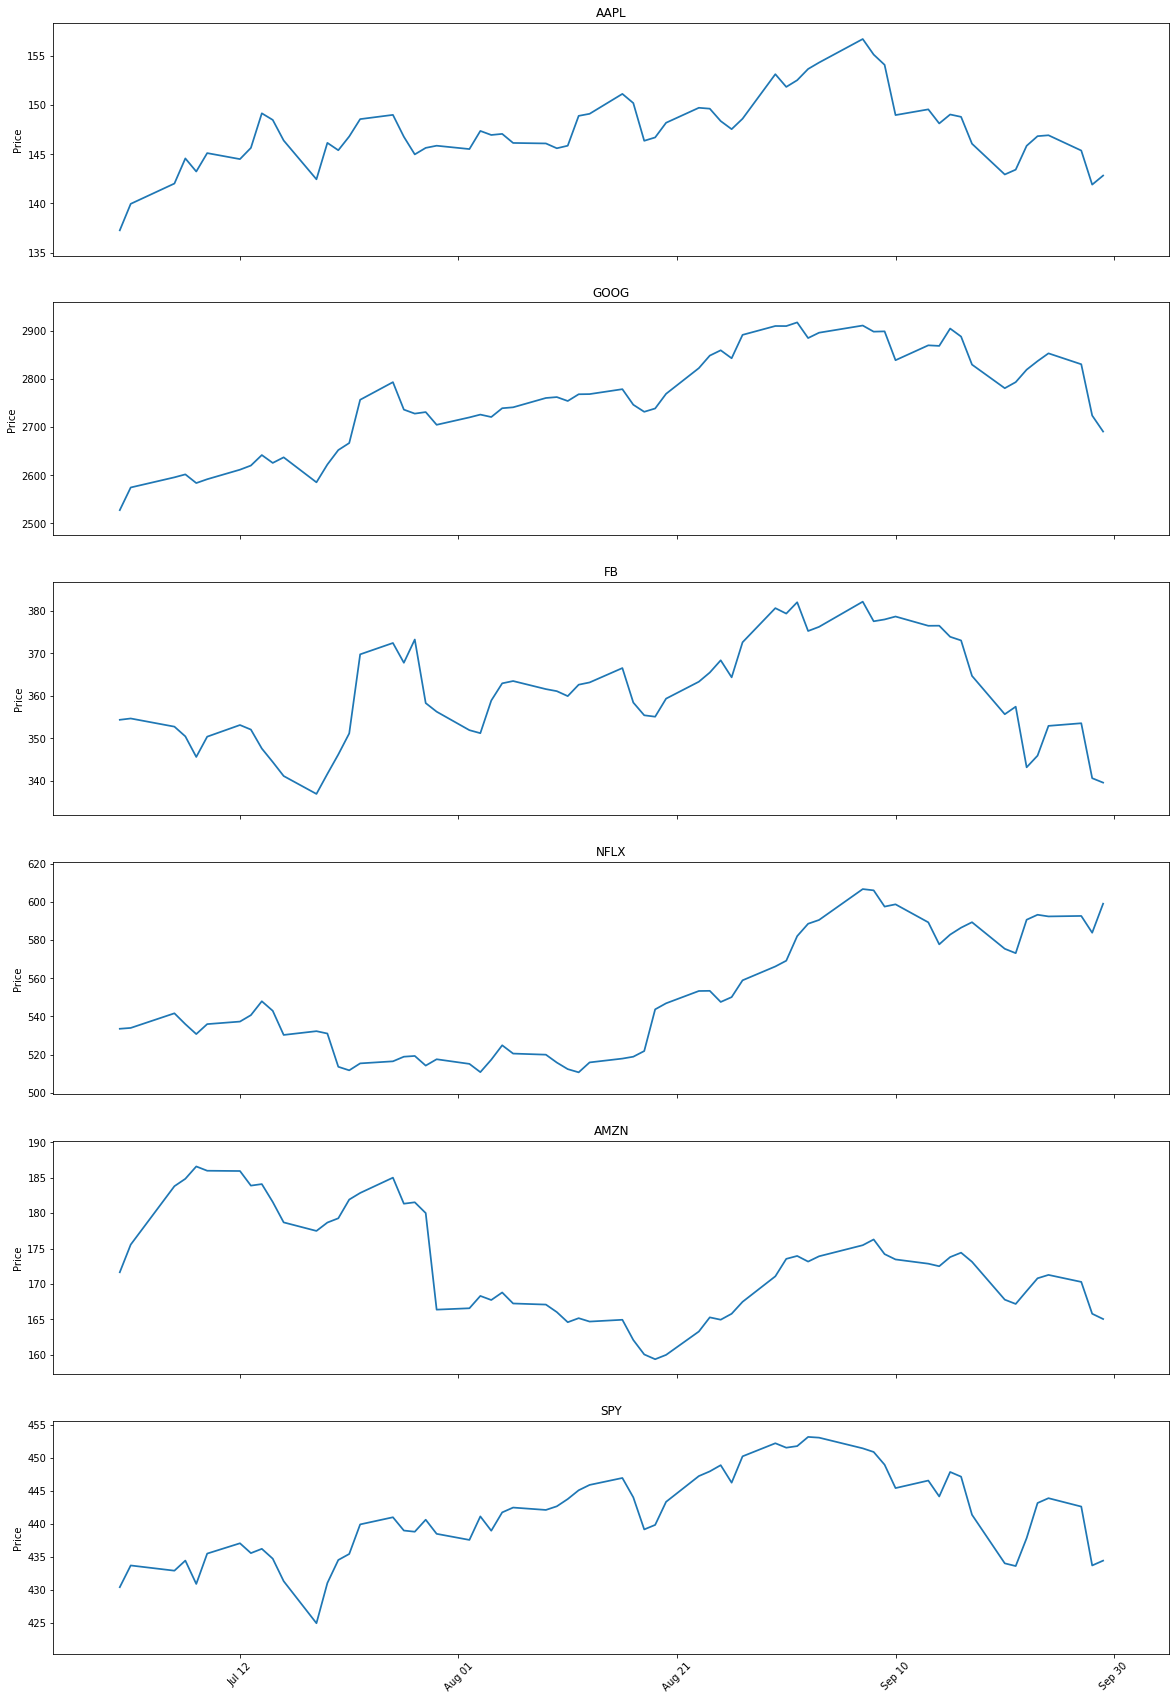

In [9]:
tickers = ['AAPL', 'GOOG', 'FB', 'NFLX', 'AMZN', 'SPY']
data = yf.download(tickers, start="2021-07-01",
                   end="2021-09-30", group_by='ticker')

aapl = data[('AAPL',)]
goog = data[('GOOG',)]
nflx = data[('NFLX',)]
amzn = data[('AMZN',)]
fb = data[('FB',)]
spy = data[('SPY',)]



N = len(tickers)
fig, axes = plt.subplots(N, figsize=(20, 5*N), sharex=True)

for df, t, ax in zip([aapl, goog, fb, nflx, amzn, spy], tickers, axes):
    mpf.plot(df, ax=ax, axtitle=t, type='line',
             show_nontrading=True)  # volume=True

In [10]:
fred = Fred(api_key='eb7052fe53df16a4838f9acb0630acef')
data = fred.get_series('SP500')

In [24]:
start = datetime.datetime (1971, 1, 1)
end = datetime.datetime (2020, 12, 31)

data_series = "WILL5000PRFC"
market_cap = pdr.DataReader(data_series, 'fred', start, end)

market_cap = market_cap.dropna()
market_cap.index = pd.to_datetime(market_cap.index)

data_series = "GDP"
gdp = pdr.DataReader(data_series, 'fred', start, end)
gdp = gdp.dropna()

gdp.index = pd.to_datetime(gdp.index)

market_cap_quarterly = pd.DataFrame()

market_cap_quarterly = market_cap
market_cap_quarterly.resample("3M").last()

market_cap_to_gdp = pd.merge(market_cap_quarterly, gdp, left_index=True, right_index=True)

market_cap_to_gdp["Date"] = market_cap_to_gdp.index

market_cap_to_gdp["WILL5000PRFC"] = market_cap_to_gdp["WILL5000PRFC"] * 1190000000

market_cap_to_gdp["Buffett Indicator"] = market_cap_to_gdp["WILL5000PRFC"] / market_cap_to_gdp["GDP"]

indicator_chart = px.area(market_cap_to_gdp, x='Date', y='Buffett Indicator',
    title='Stock Market Capitalization to GDP aka "The Buffett Indicator"',
    color_discrete_sequence=["#4499dd"],
    labels="",
    width=1250,
    height=600)

indicator_chart.update_layout(margin=dict(l=100,r=40,t=80, b=40),
    plot_bgcolor = "#eeeeee",
    paper_bgcolor="#f8f8f8") 

indicator_chart.show()